# Descrição

Teste para validar ideia de long&short usando regressão linear e desvio padrão


# Possíveis pares: 

## Setor de Energia Elétrica:

Long: AES Tietê (TIET11), Energias do Brasil (ENBR3), Energisa (ENGI11)
Short: EDP Energias do Brasil (ENBR3), Cemig (CMIG4), Light (LIGT3)

## Setor de Construção Civil:

Long: MRV Engenharia (MRVE3), Cyrela Brazil Realty (CYRE3), Eztec (EZTC3)
Short: Gafisa (GFSA3), Tecnisa (TCSA3), Even (EVEN3)

## Setor de Varejo:

Long: Magazine Luiza (MGLU3), Lojas Americanas (LAME4), B2W Digital (BTOW3)
Short: Via Varejo (VVAR3), Arezzo (ARZZ3), Hering (HGTX3)

## Setor de Bancos:

Long: Itaú Unibanco (ITUB4), Banco Bradesco (BBDC4), Banco do Brasil (BBAS3)
Short: Banco Inter (BIDI11), Banco Pan (BPAN4), Banco BMG (BMGB4)

In [59]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import IsolationForest
from datetime import timedelta,date

def stock_analysis(stock1, stock2, start_date, end_date, days_to_try):

    final_end_date_to_download = pd.to_datetime(end_date + timedelta(days=days_to_try))
    end_date = pd.to_datetime(end_date)
    stock1_data = yf.download(stock1, start=start_date, end=final_end_date_to_download)
    stock2_data = yf.download(stock2, start=start_date, end=final_end_date_to_download)

    stock1_data_train = stock1_data['Close'].loc[stock1_data.index <= end_date]
    stock2_data_train = stock2_data['Close'].loc[stock2_data.index <= end_date]

    stock1_data_test = stock1_data['Close'].loc[stock1_data.index > end_date]
    stock2_data_test = stock2_data['Close'].loc[stock2_data.index > end_date]

    # Calcula a divisão dos valores de fechamento das ações
    
    stock_division_train = stock1_data_train / stock2_data_train

    stock_division_test = stock1_data_test / stock2_data_test
    
    # Calcula a model
    X = np.arange(len(stock_division_train)).reshape(-1, 1) 
    y = stock_division_train.values.reshape(-1, 1)
    model = SVR()
    reg = model.fit(X, y)
    # lr_train = reg.predict(y)
    lr_test = reg.predict(stock_division_test.values.reshape(-1, 1))
    
    # Calcula o desvio padrão
    std = stock_division_test.std()
    std2 = stock_division_test.std() * 2

    result_df = pd.DataFrame(index=stock1_data.index)
    result_df['data_scope'] = 'train'
    result_df['data_scope'][stock_division_test.index] = 'test'

    result_df[f'valor {stock1}'] = stock1_data['Close']
    result_df[f'valor {stock2}'] = stock2_data['Close']
    result_df[f'{stock1}/{stock2}'] = result_df[f'valor {stock1}'] / result_df[f'valor {stock2}']

    lr = pd.DataFrame(index=stock1_data.index)
    lr['model'] = 0
    # lr['model'][stock1_data_train.index] = lr_train.flatten()
    lr['model'][stock1_data_train.index] = result_df[f'{stock1}/{stock2}']
    lr['model'][stock1_data_test.index] = lr_test.flatten()
    result_df['model'] = lr['model']

    stst = pd.DataFrame(index=stock1_data.index)
    stst['desvio padrão'] = 0
    stst['desvio padrão x 2'] = 0
    stst['desvio padrão'][stock_division_test.index] = std
    stst['desvio padrão x 2'][stock_division_test.index] = std2
    result_df['desvio padrão'] = stst['desvio padrão']
    result_df['desvio padrão x 2'] = stst['desvio padrão x 2']
    

    return result_df


# Plot

In [60]:
stock1 = "CPLE6.SA"
stock2 = "CMIG4.SA"
start_date = date(2023,2,1)
end_date = date(2023,2,20)
days_to_try = 10

resultados = stock_analysis( stock1, stock2, start_date, end_date, days_to_try)
# resultados

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\erycm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\erycm\AppData\Local\Temp/ipykernel_17696/1330353643.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stst['desvio padrão x 2'][stock_division_test.index] = std2
C:\Users\erycm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [61]:
resultados

,data_scope,valor CPLE6.SA,valor CMIG4.SA,CPLE6.SA/CMIG4.SA,model,desvio padrão,desvio padrão x 2
Date,,,,,,,
2023-02-01,train,7.80,11.42,0.683012,0.683012,0.0000,0.0000
2023-02-02,train,7.57,11.42,0.662872,0.662872,0.0000,0.0000
2023-02-03,train,7.46,11.17,0.667860,0.667860,0.0000,0.0000
2023-02-06,train,7.57,11.33,0.668138,0.668138,0.0000,0.0000
2023-02-07,train,7.37,10.97,0.671832,0.671832,0.0000,0.0000
2023-02-08,train,7.54,11.14,0.676840,0.676840,0.0000,0.0000
2023-02-09,train,7.35,10.86,0.676796,0.676796,0.0000,0.0000
2023-02-10,train,7.45,10.96,0.679745,0.679745,0.0000,0.0000
2023-02-13,train,7.49,11.01,0.680291,0.680291,0.0000,0.0000


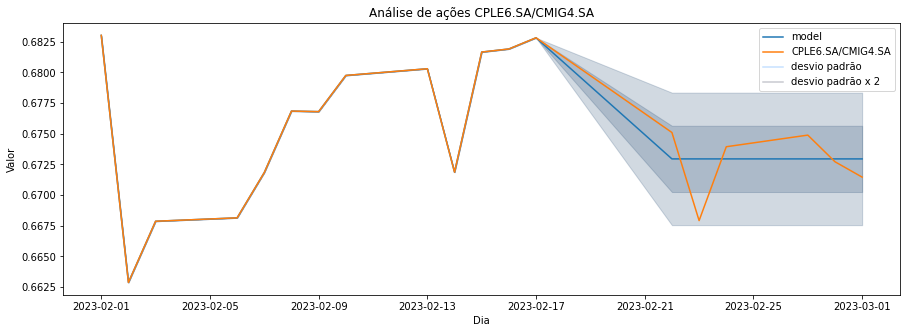

In [62]:
import matplotlib.pyplot as plt

def plot_stock_analysis(data):
    # Crie um gráfico com a divisão STOCK1/STOCK2 e a linha da model
    fig, ax = plt.subplots()
    ax.plot(data.index, data['model'], label='model')
    ax.plot(data.index, data[f'{stock1}/{stock2}'], label=stock1+"/"+stock2)

    # Adicione sombras para os intervalos de alpha
    ax.fill_between(data.index, data['model'] - 2*data['desvio padrão'], data['model'] + 2*data['desvio padrão'], alpha=0.2, color='#19416b')
    ax.fill_between(data.index, data['model'] - data['desvio padrão'], data['model'] + data['desvio padrão'], alpha=0.2, color='#19416b')

    stdev_legend = [
        (data['desvio padrão'], '#71b6ff', 'desvio padrão')
        ,(data['desvio padrão x 2'], '#747a8a', 'desvio padrão x 2')
    ]
    for alpha, color, label in stdev_legend:
        ax.plot([], [], color=color, alpha=0.4, label=label)

    # Adicione legendas e rótulos aos eixos
    ax.legend()
    ax.set_xlabel('Dia')
    ax.set_ylabel('Valor')
    ax.set_title('Análise de ações '+stock1+'/'+stock2)

    # Ajuste o tamanho da figura
    fig.set_size_inches(15, 5)

    # Exiba o gráfico
    plt.show()


plot_stock_analysis(resultados)